In [ ]:
# Here we use Kaggle API to download PlantVillage dataset by uploading API token
# You can find it by logging into your Kaggle account and going to account settings, API section and click on "Create New API Token"
! pip install kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d arjuntejaswi/plant-village

# Decompress Dataset file
!unzip plant-village.zip

# Install split_folders to use it in splitting dataset into training, validation and testing files
!pip install split_folders

Streaming output truncated to the last 5000 lines.
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08dd176c-e9d9-4746-92c3-fa8dc9074347___UF.GRC_YLCV_Lab 03057.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08f78a80-46f5-45a6-937c-4d05d61c08c2___UF.GRC_YLCV_Lab 01895.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0903aa95-6e8a-4abd-a003-126fcd9a5493___YLCV_GCREC 2806.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0911d416-d73d-4c2a-8e45-207a7ceb7c9a___YLCV_GCREC 2773.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09188838-cc89-4925-94c5-d9563c4cb4bf___UF.GRC_YLCV_Lab 02974.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0922e026-b563-438d-b9ed-7476153023ce___YLCV_GCREC 2258.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/092330d8-f6e9-48df-8525-cb391b8f00b7___YLCV_GCREC 2930.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Cur

In [ ]:
# To Delete Pepper bell datasets
!rm -r /content/PlantVillage/Pepper__bell___Bacterial_spot /content/PlantVillage/Pepper__bell___healthy

# To Delete Potato datasets
!rm -r /content/PlantVillage/Potato___Early_blight /content/PlantVillage/Potato___Late_blight /content/PlantVillage/Potato___healthy

In [ ]:
# Here we split the PlantVillage dataset into a new folder called dataset 
# which includes 3 folders: train, val, test with ratios 70%, 10% and 20% respectively.
!split_folders --output dataset --ratio .7 .1 .2 -- PlantVillage

Copying files: 16012 files [00:04, 3425.57 files/s]


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, Model
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.applications.efficientnet import EfficientNetB7
from keras.layers import Conv2D, MaxPool2D , MaxPooling2D

In [ ]:
imgSize = 256
RGBClasses = 3

trainingDataGenerator = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True,
        vertical_flip=True
)
train_generator = trainingDataGenerator.flow_from_directory(
        '/content/dataset/train',
        target_size=(imgSize,imgSize),
        batch_size=32,
        class_mode="sparse",
)

Found 11203 images belonging to 10 classes.


In [ ]:
train_generator.class_indices
classNames = list(train_generator.class_indices.keys())
classNames

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [ ]:
for images,labels in train_generator:
    print(images.shape)
    break

(32, 256, 256, 3)


In [ ]:
validationDataGenerator = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True,
        vertical_flip=True
)
validation_generator = validationDataGenerator.flow_from_directory(
        '/content/dataset/val',
        target_size=(imgSize,imgSize),
        batch_size=32,
        class_mode="sparse",
)

Found 1597 images belonging to 10 classes.


In [ ]:
testingDataGenerator = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True,
        vertical_flip=True
)
test_generator = testingDataGenerator.flow_from_directory(
        '/content/dataset/test',
        target_size=(imgSize,imgSize),
        batch_size=32,
        class_mode="sparse",
)

Found 3211 images belonging to 10 classes.


In [ ]:
inputShape = (imgSize, imgSize, RGBClasses)
n_classes = 10

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=inputShape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.build(inputShape)

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_98 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_73 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_99 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_74 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_100 (Conv2D)         (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_75 (MaxPoolin  (None, 30, 30, 64)     

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=350,
    batch_size=20,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=1,
    epochs=50,
)

Epoch 1/50
350/350 [==============================] - 205s 585ms/step - loss: 1.7429 - accuracy: 0.3639 - val_loss: 1.3099 - val_accuracy: 0.5235
Epoch 2/50
350/350 [==============================] - 203s 579ms/step - loss: 1.1266 - accuracy: 0.5962 - val_loss: 0.9064 - val_accuracy: 0.6969
Epoch 3/50
350/350 [==============================] - 203s 579ms/step - loss: 0.6856 - accuracy: 0.7607 - val_loss: 0.6392 - val_accuracy: 0.7827
Epoch 4/50
350/350 [==============================] - 203s 579ms/step - loss: 0.4675 - accuracy: 0.8340 - val_loss: 0.4523 - val_accuracy: 0.8422
Epoch 5/50
350/350 [==============================] - 202s 578ms/step - loss: 0.3821 - accuracy: 0.8632 - val_loss: 0.3797 - val_accuracy: 0.8723
Epoch 6/50
350/350 [==============================] - 207s 590ms/step - loss: 0.3327 - accuracy: 0.8837 - val_loss: 0.3022 - val_accuracy: 0.9011
Epoch 7/50
350/350 [==============================] - 204s 583ms/step - loss: 0.2668 - accuracy: 0.9084 - val_loss: 0.2806 -

In [ ]:
evaluation = model.evaluate(test_generator)

101/101 [==============================] - 49s 481ms/step - loss: 0.1557 - accuracy: 0.9667


Text(0.5, 0, 'epoch')

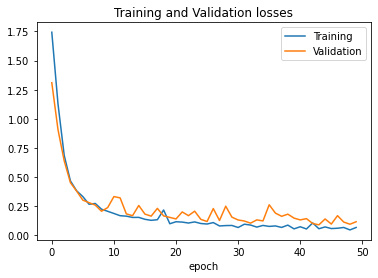

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

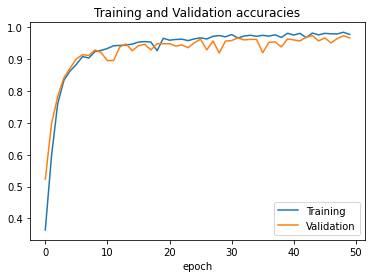

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuracies')
plt.xlabel('epoch')

first image to predict
actual label: Tomato_Leaf_Mold
predicted label: Tomato_Leaf_Mold


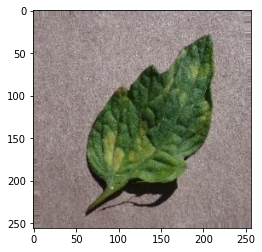

In [ ]:
for images, labels in test_generator:
    
    first_image = images[0]
    first_label = int(labels[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",classNames[first_label])
    
    batch_prediction = model.predict(images)
    print("predicted label:",classNames[np.argmax(batch_prediction[0])])
    break

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = classNames[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

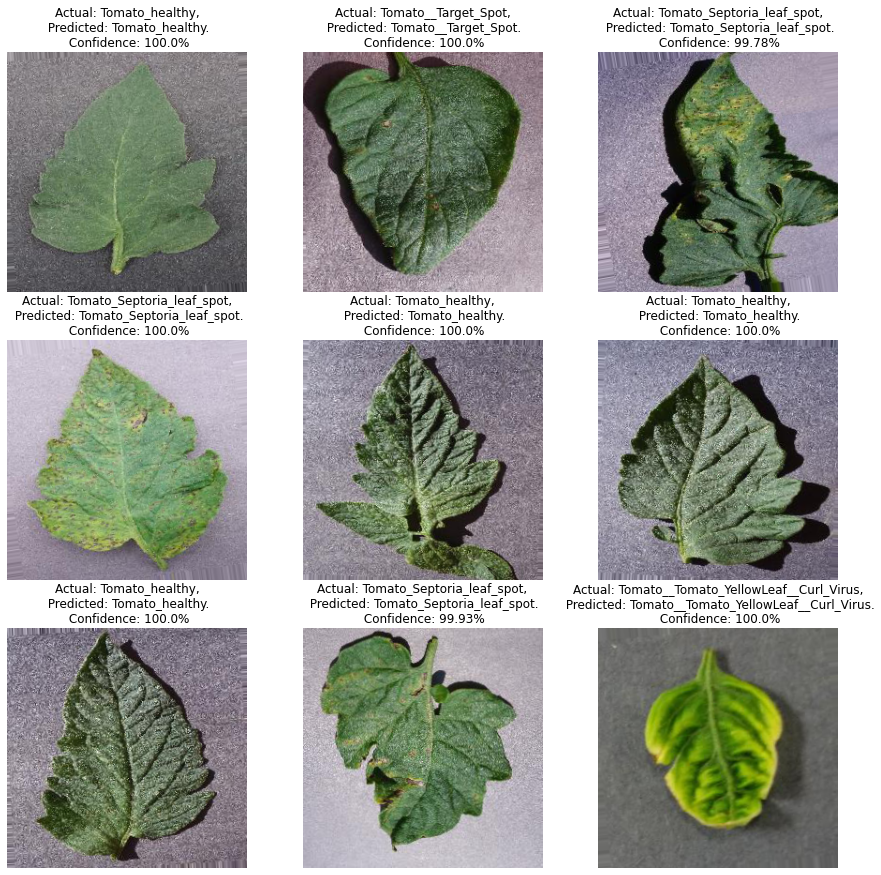

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = classNames[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [ ]:
model.save("/content/tomatoes.h5")